In [1]:
import asyncio
import sys

if sys.platform.startswith('win'):
    asyncio.set_event_loop_policy(asyncio.WindowsSelectorEventLoopPolicy())

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd

In [3]:
# Definim tab20 com la paleta per defecte dels plots
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab20.colors)

In [4]:
# Llegim les dades
dataarray = xr.open_dataset('stats.nc', engine='scipy')
dataarray

<xarray.Dataset> Size: 116kB
Dimensions:                (matchday: 46, player: 17)
Coordinates:
  * matchday               (matchday) int32 184B 0 1 2 3 4 5 ... 41 42 43 44 45
  * player                 (player) object 136B 'Alejandro' 'Antía' ... 'Víctor'
Data variables: (12/23)
    GamesPlayed            (matchday, player) int32 3kB ...
    PlayedAttack           (matchday, player) int32 3kB ...
    PlayedDefense          (matchday, player) int32 3kB ...
    WinPlayed              (matchday, player) float64 6kB ...
    WinPlayedAttack        (matchday, player) float64 6kB ...
    WinPlayedDefense       (matchday, player) float64 6kB ...
    ...                     ...
    ReceivedDefensePlayed  (matchday, player) float64 6kB ...
    ELOAttack              (matchday, player) float64 6kB ...
    ELODefense             (matchday, player) float64 6kB ...
    AttackIndex            (matchday, player) float64 6kB ...
    DefenseIndex           (matchday, player) float64 6kB ...
    WeightedELO            (matchday, player) float64 6kB ...

In [5]:
# Extreiem els noms dels jugadors i les jornades
players_names = dataarray['player'].astype(str).values # noms dels jugadors
players_names.shape

(17,)

A continuació definim quins paràmetres volem pintar i per quins jugadors. És recomanable no atapeir gaire el gràfic amb molts paràmetres o jugadors. El llistat de paràmetres amb els seus noms es pot consultar al desplegable `Data variables`, quan es mostra l'objecte `dataarray`.

In [12]:
stats = ['WeightedELO', 'ELODefense', 'WinPlayedDefense', 'ReceivedDefensePlayed', 'ScoredDefensePlayed', 'WinPlayedAttack', 'ELOAttack']
players = ['Dani', 'Luis', 'Antía', 'Rebeca', 'Pedro', 'Pau']

In [13]:
normalizing_values = dataarray[stats].sel(player=players).isel(matchday = -1).max().as_numpy() # valors màxims per normalitzar el plot a 1

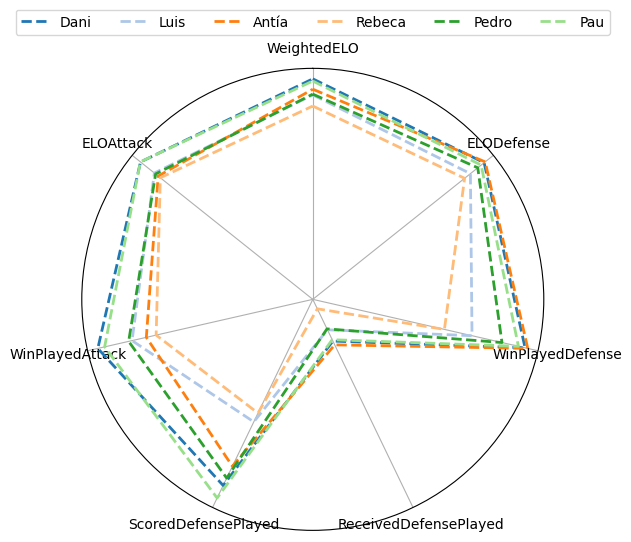

In [31]:
### values = [4, 3, 2, 5, 4]

#Values that will be reversed (the lowest value, the better)
reversed_stats = [ 'ReceivedDefensePlayed']

# Number of variables
num_vars = len(stats)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop" and append the start value to the end.
angles += angles[:1]

# Create the figure
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Draw one axe per variable and add labels
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], stats)

# Draw ylabels
#ax.set_rscale('log')
plt.yticks([], labels=[])
#plt.yticks([1, 2, 3, 4, 5], ["1", "2", "3", "4", "5"], color="grey", size=7)
#plt.ylim(0, 5)

# Plot data
for player in players:
    # Potser el càlcul de cada element es pot posar en una funció i quedarà més compacte
    values = [dataarray[stats[i]].sel(player=player).isel(matchday=-1) / normalizing_values[stats[i]]_values[stats[i]]).as_numpy()  for i in range(num_vars)] # values for each stats for this player
    
    values += values[:1] # "complete the loop"

    # Normalitzem
#    values = values / normalizing_values

    # Pintem
    ax.plot(angles, values, linestyle='dashed', linewidth = 2, label = player)

    # Fill area
    #ax.fill(angles, values, 'b', alpha=0.1)

plt.legend(ncol = 6, bbox_to_anchor=(0.5, 1.1), loc = 'center')
plt.savefig('results/radial_stats.png', dpi=300, bbox_inches='tight')
plt.show()

In [9]:
dataarray.close()